A:
[[1.10000000e+00 1.65000000e+00 2.58500000e+00 4.20750000e+00
  7.07333000e+00 1.22124750e+01 2.15477405e+01 3.86920628e+01
  7.04729993e+01 1.29858097e+02 2.41586573e+02]
 [1.65000000e+00 2.58500000e+00 4.20750000e+00 7.07333000e+00
  1.22124750e+01 2.15477405e+01 3.86920628e+01 7.04729993e+01
  1.29858097e+02 2.41586573e+02 4.53042553e+02]
 [2.58500000e+00 4.20750000e+00 7.07333000e+00 1.22124750e+01
  2.15477405e+01 3.86920628e+01 7.04729993e+01 1.29858097e+02
  2.41586573e+02 4.53042553e+02 8.55303638e+02]
 [4.20750000e+00 7.07333000e+00 1.22124750e+01 2.15477405e+01
  3.86920628e+01 7.04729993e+01 1.29858097e+02 2.41586573e+02
  4.53042553e+02 8.55303638e+02 1.62398427e+03]
 [7.07333000e+00 1.22124750e+01 2.15477405e+01 3.86920628e+01
  7.04729993e+01 1.29858097e+02 2.41586573e+02 4.53042553e+02
  8.55303638e+02 1.62398427e+03 3.09866145e+03]
 [1.22124750e+01 2.15477405e+01 3.86920628e+01 7.04729993e+01
  1.29858097e+02 2.41586573e+02 4.53042553e+02 8.55303638e+02
  1.62398427e

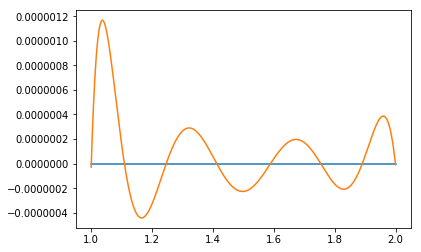

In [2]:
import numpy as np
from math import exp, log
import matplotlib.pyplot as plt

a = 1.0
b = 2.0
N = 10
delta = (b - a) / N
alpha = 1.7

points = [a + i * delta for i in range(N + 1)]
c = np.zeros((N + 1, 1))

def l2scalar(f, g):
    values = [f(point) * g(point) for point in points]
    return np.sum(np.array(values, dtype=np.double) * delta)
    #return np.trapz(values, points)

def l2norm(f):
    return l2scalar(f, f)

def f(x):
    return alpha * exp(-x) + (1 - alpha) * log(x)

def phi(i):
    return lambda x: x ** i

def getPhi(c):
    phi = "ф(x) = "
    for i in range(len(c)):
        if c[i] < 0:
            phi += "- " + str(abs(c[i]))
        else:
            if i != 0:
                phi += "+ "
            phi += str(c[i])
        if i != 0:
            phi += "x"
            if i != 1:
                phi += "^" + str(i)
        phi += " "
    return phi

def solution(x):
    global c
    value = 0.0
    for i in range(len(c)):
        value += c[i] * phi(i)(x)
    return value

def plotDifference(samples):
    space = np.linspace(a, b, samples)
    plt.plot(space, np.zeros(np.shape(space)))
    plt.plot(space, np.array([solution(x) - f(x) for x in space], dtype=np.double))
    plt.show()
    
if __name__ == '__main__':
    A = np.array([[l2scalar(phi(i), phi(j)) for j in range(N + 1)] for i in range(N + 1)],
                 dtype = np.double)
    B = np.array([l2scalar(f, phi(i)) for i in range(N + 1)], dtype = np.double)

    print("A:\n" + str(A))
    print("b:\n" + str(B))

    c = np.linalg.solve(A, B)

    print("c:\n" + str(c))
    
    print(getPhi(c))

    check = [points[0] + delta / 2.6, 
             points[5] + delta / 2.6,
             points[9] + delta / 2.6]

    print("Maximum deficiency: " + 
          str(np.max(np.abs(np.array([(solution(x) - f(x)) for x in check], dtype=np.double)))))
    
    plotDifference(1000)